# Diagrams Overview

One piece generate document workflows allow for the creation of materials containing a wide variety of simple diagrams produced from simple text descriptions contained withing the body of the document.

Making changes to the diagram simply requires a change to the original text description of it. When the document is reflowed, the diagram will be directly updated. There is no distance between the source material and the rendered diagram. The source material contains the description of the diagram and rendered directly from it.

By providing learners with tools of production related to diagram generation, we also make it easier for them to create their own diagrams and explore appropriate visual ways of supporting their own learning.

Several package exists that support the generation of diagrams from simple text descriptions of them. Through the creation of simple magics, we can use cell block magic to configure a code cell to accept these various description types and then render diagrams directly from them.

By including the the textual generator script in the source document, output assets can be generated in situ. Updating or maintaining the inages takes place in the context within which the asset is used, minimising opportunities for the asset and the surrounding text context to become disjointed.

The availability of simple text descriptions of a diagram, from which diagrams are typically rendered according to a fixed convention (although layout algorithms may determine the specific location of diagram components within a particular diagram) might also be used as mimimally sufficient text description of many key features of the diagram.

Currently, meaningful human readable "long description" text descriptions to support accessibility are *not* generated from the original generative text descritptions, but the potential is there for such development if the will is there to exploit it.

## Blockdiag Package Diagrams

The [`blockdiag`](http://blockdiag.com/en/) package provides tools for generating several types of diagram, from simple box and arrows diagrams to various disgrams familiar to communications and system engineers.

The diagrams are defined using simple text structures. Various IPython block magics allow these descriptions to be entered direclty in to a magicked code cell, and the diagram generated diectly therefrom.

The diagrams are generated by default as SVG diagrams and can be saved to a named file if requierd; `.png `format images may also be created.

All the magics are enabled from a single load command:

In [ ]:
%%capture
try:
    import blockdiag_magic
except:
    %pip install blockdiagMagic

In [2]:
%load_ext blockdiag_magic

### Block Diagrams

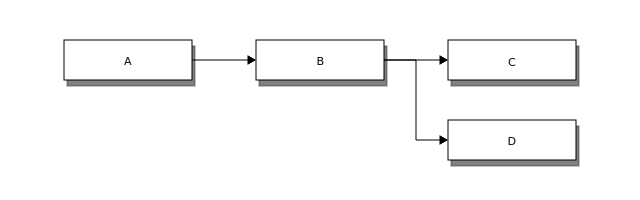

In [2]:
%%blockdiag
A -> B -> C;
B -> D;

### Network Diagrams

The *network diagram* type can be used to demonstrate the connectivity of nodes to different IP (internet protocol) network ranges.

In the following diagram, we save the SVG image to an explicit file as an additional output. (The direct output is hidden using a publishing system tag in the original source document.)

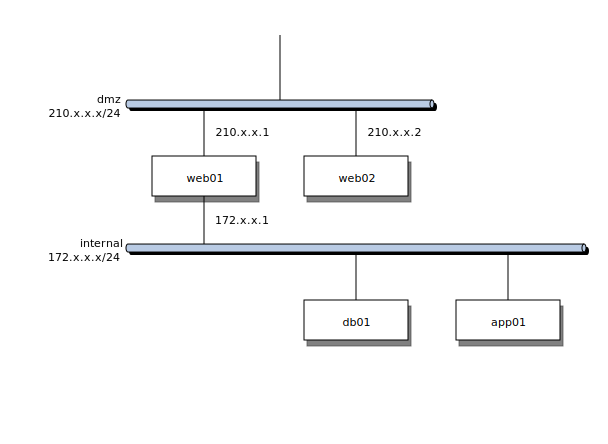

In [29]:
%%nwdiag --outfile demo1.svg
  network dmz {
      address = "210.x.x.x/24"

      web01 [address = "210.x.x.1"];
      web02 [address = "210.x.x.2"];
  }
  network internal {
      address = "172.x.x.x/24";

      web01 [address = "172.x.x.1"];
      db01;
      app01;
  }

We can then explictly render the image, from the saved file, as required:

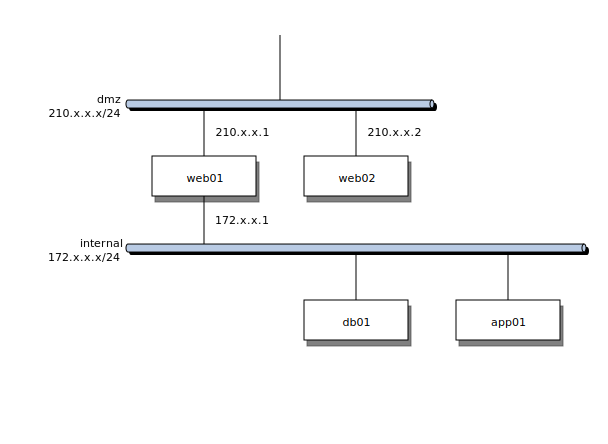

In [4]:
from IPython.display import SVG
SVG('demo1.svg')

Nodes can also be grouped in coloured blocks.

The network diagram type can also be used to sketch higher level network diagrams:

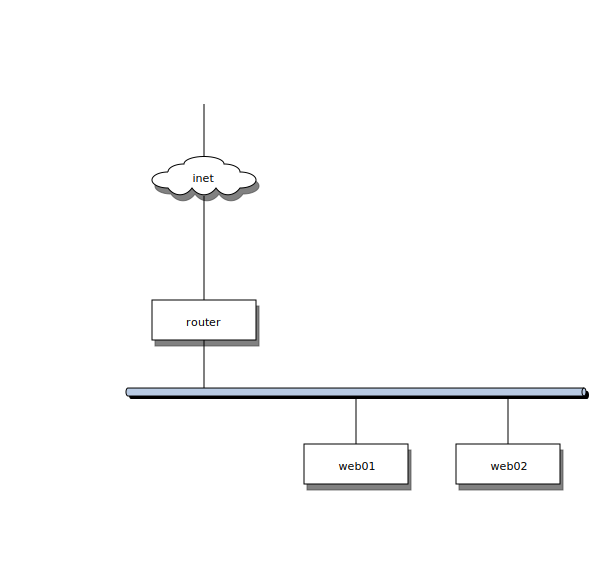

In [28]:
%%nwdiag

  inet [shape = cloud];
  inet -- router;

  network {
    router;
    web01;
    web02;
  }


### Rack Diagrams

The rack diagram (`rackdiag`) type is useful for generating diagrams that illustrate the different components that might be present in a physical rack server cabinet.

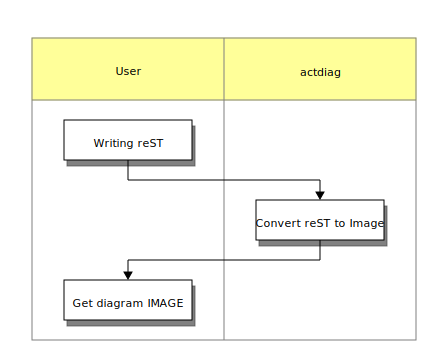

In [21]:
%%actdiag --outfile delme1.svg
  write -> convert -> image

  lane user {
     label = "User"
     write [label = "Writing reST"];
     image [label = "Get diagram IMAGE"];
  }
  lane actdiag {
     convert [label = "Convert reST to Image"];
  }


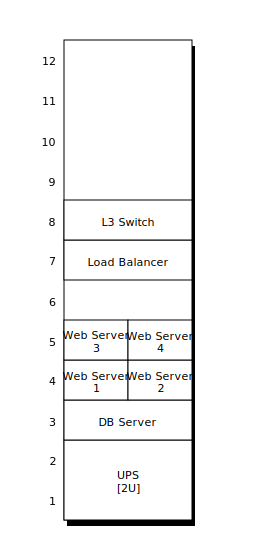

In [19]:
%%rackdiag --outfile delme2.svg

12U

1: UPS [2U];
3: DB Server
4: Web Server 1 
4: Web Server 2
5: Web Server 3
5: Web Server 4
7: Load Balancer
8: L3 Switch


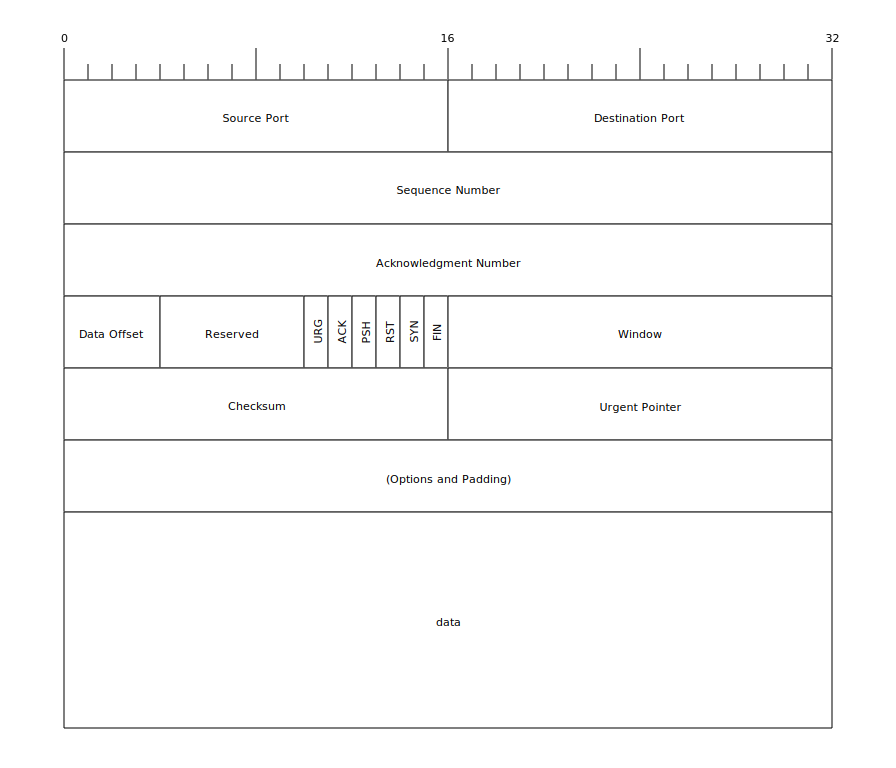

In [25]:
%%packetdiag
  colwidth = 32
  node_height = 72

  0-15: Source Port
  16-31: Destination Port
  32-63: Sequence Number
  64-95: Acknowledgment Number
  96-99: Data Offset
  100-105: Reserved
  106: URG [rotate = 270]
  107: ACK [rotate = 270]
  108: PSH [rotate = 270]
  109: RST [rotate = 270]
  110: SYN [rotate = 270]
  111: FIN [rotate = 270]
  112-127: Window
  128-143: Checksum
  144-159: Urgent Pointer
  160-191: (Options and Padding)
  192-223: data [colheight = 3]

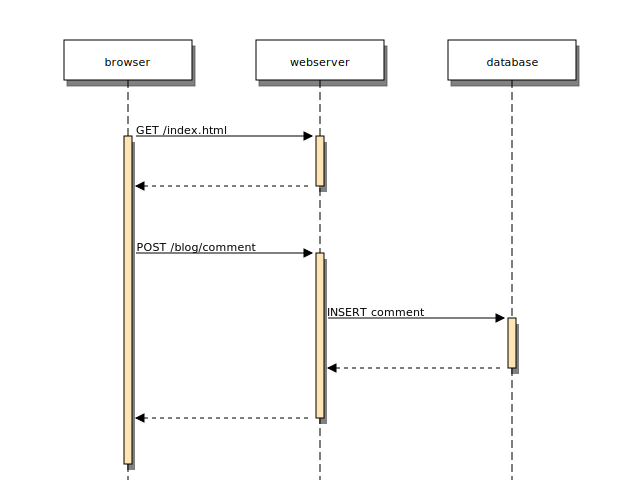

In [16]:
%%seqdiag
browser  -> webserver [label = "GET /index.html"];
browser <-- webserver;
browser  -> webserver [label = "POST /blog/comment"];
          webserver  -> database [label = "INSERT comment"];
          webserver <-- database;
browser <-- webserver;



## Flow Charts

To render a flowchart, we can use the `flowchart.js` Javascript package wrapped as an `ipywidget` using the [`flowchart_js_jp_proxy_widget`](https://github.com/innovationOUtside/flowchart_js_jp_proxy_widget) package which is capable of generating SVG output image files.

In an interactive notebook, we can simply use the `%%flowchart_magic` block magic to render a flowchart from a flowchart definition. The process is slightly more laboured when generating flowcharts for use in a static Jupyter Book output format, since we must create an initial output file from an interactive notebook running in a browser before then rendering that saved data in the Jupyter Book output generating run.

In [93]:
from jp_flowchartjs.jp_flowchartjs import FlowchartWidget

# The flowchart defintin script
code = """
st=>start: Start
e=>end: End
op1=>operation: Set counter to 0
op2=>operation: Draw side code
op3=>operation: Turn ninety degrees code
op4=>operation: Add 1 to counter
cond=>condition: Is counter < 4?
st(right)->op1(right)->op2->op3->cond
cond(yes, right)->op2
cond(no, bottom)->e
"""


def dummy_flowcharter(code):
    # Generate an output widget to generate SVG code
    dummy_output = FlowchartWidget()
    dummy_output.charter(code)
    return dummy_output
    
dummy_flowcharter(code)

FlowchartWidget(status='deferring flush until render')

*Note that this currently requires running the notebook in a browser interface and saving the SVG to an output file that can then be loaded in an rendered. The direct Jupyer Book build approach does not ncessarily generate the required image data.*

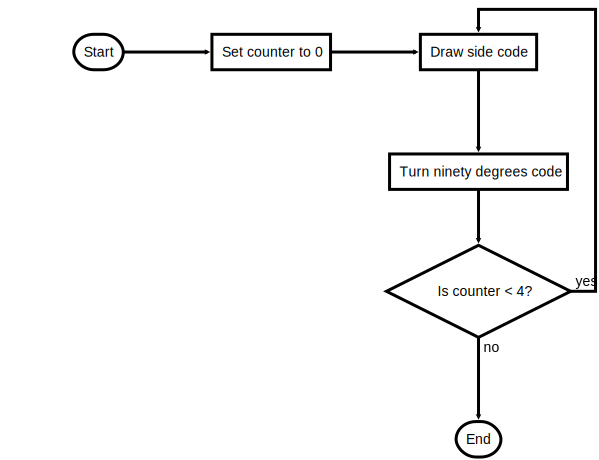

In [87]:
from IPython.display import SVG

def svg_hack(dummy, test_file = "test.svg"):
    svg_data = dummy.get_svg()

    if svg_data:
        with open(test_file, "w") as f:
            f.write(svg_data)

    return SVG(test_file)

svg_hack(dummy_output)

It is also possible to generate a flowchart based on the contents of a code cell. In an interactive notebook, we can do this directly using the `%%pyflowchart_magic` block magic:

In [95]:
import time

def demo(msg='demo'):
    for i in range(10):
        print(f'{msg} loopcount is {i}')
        time.sleep(i)

In [96]:
%%capture code
# This gets the content of the previous cell
%history -l 1

In [97]:
from pyflowchart import Flowchart

# Generate a flowchart from the grabbed code
fc = Flowchart.from_code(code.stdout)
fc_text = str(fc.flowchart())

# Render
dummy_flowcharter(fc_text)

FlowchartWidget(status='deferring flush until render')

In [98]:
svg_hack(code_flowchart)

## Other js Diagramming Tools

A variety of javascript based text to diagram tools exist that are not currently natively supported by Jupyer notebook extensions or magics. However, if the will were there, it should not be too hard to make them play nicely with Jupyer notebooks in a similar way to the examples provided above.

- [`js-sequence-diagrams`](https://bramp.github.io/js-sequence-diagrams/);
- [`mermaid.js`](https://mermaid-js.github.io/mermaid/#/)
- [timing diagrams](https://wavedrom.com/)
- supporting diagramming generation via markdown fenced code blocks using [*Markdown preview enhancdd*](https://shd101wyy.github.io/markdown-preview-enhanced/#/) VS Code extension.